# taking out data related to mental illness (document)

In [1]:
text_corpus = ["Research suggests that a combination of genetic biological environmental and psychological factors play a role in depression",
              "Different people have different symptoms,some symptoms of depression include:Persistent sad, anxious, or “empty” Feelings of guilt, worthlessness, or helplessness",
               "Talk to your health care provider about any side effects that you have. Do not stop taking your antidepressant without first talking to your health care provider",
               "Psychotherapy helps by teaching new ways of thinking and behaving, and changing habits that may be contributing to depression",
               "Electroconvulsive therapy (ECT) and other brain stimulation therapies may be an option for people with severe depression who do not respond to antidepressant medications",
               "Call your or your loved one’s health professional",
               "As you continue treatment you may start to feel better gradually",
              "Help him or her adhere to the treatment plan such as setting reminders to take prescribed medications",
               "Women have depression more often than men. Biological lifecycle and hormonal factors that are unique to women may be linked to their higher depression rate",
               "Men with depression are more likely to be very tired irritable and sometimes angry. They may lose interest in work or activities they once enjoyed, have sleep problems, and behave recklessly and fail to seek help",
               "Older adults with depression may have less obvious symptoms, or they may be less likely to admit to feelings of sadness or grief",
               "Younger children with depression may pretend to be sick, refuse to go to school cling to a parent or worry that a parent may die",
               "Older children and teens with depression may get into trouble at school  and be irritable. Teens with depression may have symptoms of other disorders such as anxiety eating disorders  or substance abuse",
               "Once diagnosed, depression can be treated with medications psychotherapy or a combination of the two",
               "Offer support, understanding patience, and encouragement",
               "Sadness makes up part of the various definitions of the depressive syndrome even if its presence is not required for diagnosis"
 "Never ignore comments about suicide and report them to your loved one’s health care provider or therapist",
              "Distinguishing between them can help people get the help and support or treatment they need",
              "Anxiety disorders are the most common of mental disorders",]
              


In [2]:
import pprint

In [4]:
import nltk
import re
import string

# Creating dictionary and modifiying my stoplist according to my data

In [5]:
stoplist = set('about are as do a may one’s  that they or your have once other such you to of in and be with the for get can them'.split(' '))

# Lowercase each document, split it by white space and filter out stopwords

texts = [[word for word in document.lower().split() if word not in stoplist] 
         for document in text_corpus]



# Count word frequencies
from collections import defaultdict

frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

[['combination', 'biological', 'factors', 'depression'],
 ['different', 'people', 'different', 'symptoms', 'depression', 'feelings'],
 ['health',
  'care',
  'provider',
  'not',
  'antidepressant',
  'health',
  'care',
  'provider'],
 ['psychotherapy', 'depression'],
 ['people', 'depression', 'not', 'antidepressant', 'medications'],
 ['loved', 'health'],
 ['treatment'],
 ['help', 'treatment', 'medications'],
 ['women',
  'depression',
  'more',
  'biological',
  'factors',
  'women',
  'depression'],
 ['depression', 'more', 'likely', 'help'],
 ['older', 'depression', 'less', 'less', 'likely', 'feelings', 'sadness'],
 ['children', 'depression', 'school', 'parent', 'parent'],
 ['older',
  'children',
  'teens',
  'depression',
  'school',
  'teens',
  'depression',
  'symptoms',
  'disorders',
  'anxiety',
  'disorders'],
 ['depression', 'medications', 'psychotherapy', 'combination'],
 [],
 ['sadness', 'not', 'loved', 'health', 'care', 'provider'],
 ['help', 'people', 'help', 'treatmen

In [6]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(30 unique tokens: ['biological', 'combination', 'depression', 'factors', 'different']...)


# we have 30 unique tokens

In [7]:
pprint.pprint(dictionary.token2id)

{'antidepressant': 8,
 'anxiety': 27,
 'biological': 0,
 'care': 9,
 'children': 24,
 'combination': 1,
 'depression': 2,
 'different': 4,
 'disorders': 28,
 'factors': 3,
 'feelings': 5,
 'health': 10,
 'help': 17,
 'less': 21,
 'likely': 20,
 'loved': 15,
 'medications': 14,
 'more': 18,
 'not': 11,
 'older': 22,
 'parent': 25,
 'people': 6,
 'provider': 12,
 'psychotherapy': 13,
 'sadness': 23,
 'school': 26,
 'symptoms': 7,
 'teens': 29,
 'treatment': 16,
 'women': 19}


In [8]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(2, 1), (4, 2), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 2), (10, 2), (11, 1), (12, 2)],
 [(2, 1), (13, 1)],
 [(2, 1), (6, 1), (8, 1), (11, 1), (14, 1)],
 [(10, 1), (15, 1)],
 [(16, 1)],
 [(14, 1), (16, 1), (17, 1)],
 [(0, 1), (2, 2), (3, 1), (18, 1), (19, 2)],
 [(2, 1), (17, 1), (18, 1), (20, 1)],
 [(2, 1), (5, 1), (20, 1), (21, 2), (22, 1), (23, 1)],
 [(2, 1), (24, 1), (25, 2), (26, 1)],
 [(2, 2), (7, 1), (22, 1), (24, 1), (26, 1), (27, 1), (28, 2), (29, 2)],
 [(1, 1), (2, 1), (13, 1), (14, 1)],
 [],
 [(9, 1), (10, 1), (11, 1), (12, 1), (15, 1), (23, 1)],
 [(6, 1), (16, 1), (17, 2)],
 [(27, 1), (28, 2)]]


In [9]:
from gensim.models import Word2Vec

In [10]:
model = Word2Vec(processed_corpus, min_count=1)


words = model.wv.vocab

In [12]:
vector = model.wv['health']

print(vector)

[ 4.0873066e-03  2.7649535e-03  3.1486971e-04 -3.3596132e-03
  4.9678320e-03 -1.6106582e-03 -6.6627108e-04 -2.1219831e-03
  2.9019322e-03  3.7743731e-03  4.4512348e-03 -2.6596789e-03
  4.1816430e-03  2.4639361e-03  4.1261711e-03  2.7103629e-03
 -3.8586715e-03 -1.7728129e-03  1.9885490e-03 -3.9800750e-03
  3.3752953e-03  5.0387310e-04  1.0113572e-03  4.3166592e-03
  2.5894078e-03  2.7791120e-03 -5.9480971e-04 -2.3988553e-03
  2.6507017e-03 -3.3121085e-04 -1.8780053e-03 -7.7918769e-05
  3.4226459e-03  1.2945101e-03  7.4450509e-04  2.1382731e-03
  3.2674973e-03  3.0143191e-03 -1.7285206e-03 -2.8449174e-03
 -5.5323518e-04  9.0387941e-04  2.9767477e-03  2.3588203e-04
 -4.4345669e-03  1.0004243e-03  6.9367304e-04  2.4477972e-03
  1.8176341e-03  3.8751869e-03  4.0800218e-03  4.3981504e-03
 -3.8588699e-03  3.1946055e-03  1.2870787e-03  4.2896192e-03
  1.6203733e-03  3.4315707e-03  4.8752776e-03 -2.5496213e-03
  3.7088362e-03  4.8438557e-03  2.1935217e-03  1.9219856e-03
 -1.6665623e-03  4.67730

In [ ]:
#let's check similarity among these words

In [20]:
model.wv.similarity(w1='sadness',w2='feelings')
#quite similar

0.12212704

In [21]:
model.wv.similarity(w1='teens',w2='older')
#not similar

-0.009644438

In [22]:
model.wv.similarity(w1='loved',w2='care')
#quite similar

0.03944992

In [13]:
similar = model.wv.most_similar('children',topn=5)

similar
#we can see parent is related the most with children

[('parent', 0.1768890619277954),
 ('less', 0.14932197332382202),
 ('provider', 0.1304764598608017),
 ('more', 0.12600311636924744),
 ('feelings', 0.09965918958187103)]

In [29]:
similar = model.wv.most_similar('disorders',topn=10)

similar
#let's see top 10  similar words for disorders

[('help', 0.1666468381881714),
 ('psychotherapy', 0.09978431463241577),
 ('health', 0.08214759826660156),
 ('school', 0.06346945464611053),
 ('care', 0.06126336753368378),
 ('factors', 0.037611477077007294),
 ('parent', 0.02739354409277439),
 ('older', 0.009381450712680817),
 ('women', 0.004310838878154755),
 ('depression', 0.0025748275220394135)]

In [26]:
similar = model.wv.most_similar('treatment',topn=5)

similar
#let's see top 5  similar words for disorders
#we can see teens is most similar  with treatment ,
#but also medications, care are in top 5 which are actualy related to treatment

[('teens', 0.20906871557235718),
 ('care', 0.20864924788475037),
 ('different', 0.13922441005706787),
 ('sadness', 0.12570586800575256),
 ('medications', 0.12468249350786209)]

In [16]:
model.wv.doesnt_match(["more","less","loved"])
#less does'nt match with more and loved

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'less'

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting graph for 20 words(unique tokens) from the dictionary and analysing similarity among them

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


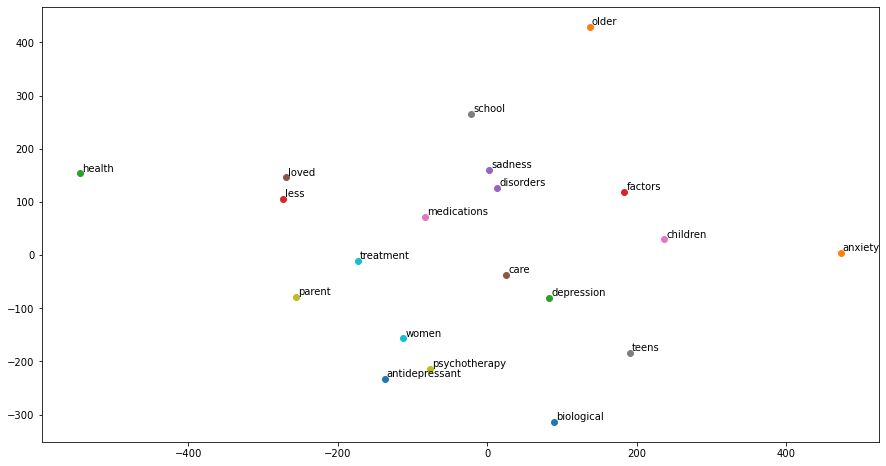

In [18]:
from sklearn.manifold import  TSNE
vocab = ['biological', 'older', 'depression', 
         'factors', 'disorders','care','children','teens','parent','women',
         'antidepressant','anxiety','health','less','sadness','loved','medications','school','psychotherapy','treatment']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=15, n_components=3, init='pca', random_state=32)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)
#we can see sadness,disorders are very close,
#antidepressant,pyschotherapy are close(as they both help as a solution to depression)
#medications and treatment are close
#women parent are close